# Loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.impute import KNNImputer

from ctgan import CTGAN

In [2]:
target_column = 'dropoutFlag'

fieldKeys = [
  'age',
  'attendancePercentage',
  'lateSubmissionCount',
  'cgpa',
  'previousYearPerformance',
  'mathScore',
  'englishScore',
  'scienceScore',
  'projectScore',
  'totalMarks',
  'feesPaid',
  'libraryDues',
  'sportsScore',
  'behaviorScore',
  'scholarshipEligibility',
  'specialNeedsFlag'
]

ml_fields = fieldKeys + [target_column]
ml_fields

['age',
 'attendancePercentage',
 'lateSubmissionCount',
 'cgpa',
 'previousYearPerformance',
 'mathScore',
 'englishScore',
 'scienceScore',
 'projectScore',
 'totalMarks',
 'feesPaid',
 'libraryDues',
 'sportsScore',
 'behaviorScore',
 'scholarshipEligibility',
 'specialNeedsFlag',
 'dropoutFlag']

# Loading data and preliminary analysis

In [4]:
real_data = pd.read_csv('../data/real_data.csv')

print(f'Columns: {real_data.columns}')
print(f'Shape: {real_data.shape}')

Columns: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without eva

In [5]:
real_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [7]:
real_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
# No imputation needed
real_data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

# Data Cleaning

## Dropping unwnated features

In [9]:
required_data = real_data.drop(['Marital status', 'Application mode', 'Application order', 'Unemployment rate','Inflation rate', 'GDP', 'Nacionality', 'Course' ], axis=1)

## Formatting features

In [10]:
# formatting column names
rename_map = {
  'Daytime/evening attendance': 'studyMode',
  'Previous qualification': 'previousEducation',
  'Displaced': 'displacedStatus',
  'Educational special needs': 'specialNeeds',
  'Debtor': 'debtor',
  'Tuition fees up to date': 'feesStatus',
  'Gender': 'gender',
  'Scholarship holder': 'scholarShipStatus',
  'Age at enrollment': 'ageAtEnrollment',
  'International': 'international',
  "Mother's qualification": 'motherEducation',
  "Father's qualification": 'fatherEducation',
  "Father's occupation": "fatherOccupation",
  "Mother's occupation": "motherOccupation",
  "Target": "dropoutStatus"
}

required_data =required_data.rename(rename_map, axis=1)

required_data.columns

Index(['studyMode', 'previousEducation', 'motherEducation', 'fatherEducation',
       'motherOccupation', 'fatherOccupation', 'displacedStatus',
       'specialNeeds', 'debtor', 'feesStatus', 'gender', 'scholarShipStatus',
       'ageAtEnrollment', 'international',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'dropoutStatus'],
      dtype='object')

## Segragation into separate categories

In [11]:
target_column = 'dropoutStatus'

admission_features = ['studyMode', 'previousEducation', 'motherEducation', 'fatherEducation', 'motherOccupation', 'fatherOccupation', 'displacedStatus', 'specialNeeds', 'gender', 'international', 'ageAtEnrollment']
financial_features = ['debtor', 'feesStatus', 'scholarShipStatus']
performance_features = required_data.drop(admission_features + financial_features + [target_column], axis=1).columns.to_list()

print(f'Admission features: {admission_features}\ntotal: {len(admission_features)}')
print(f'financial features: {financial_features}\ntotal: {len(financial_features)}')
print(f'performance features: {performance_features}\ntotal: {len(performance_features)}')

Admission features: ['studyMode', 'previousEducation', 'motherEducation', 'fatherEducation', 'motherOccupation', 'fatherOccupation', 'displacedStatus', 'specialNeeds', 'gender', 'international', 'ageAtEnrollment']
total: 11
financial features: ['debtor', 'feesStatus', 'scholarShipStatus']
total: 3
performance features: ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']
total: 12


## Feature engineering

In [12]:
# Parent feature engineering
parent_features = [feature for feature in admission_features if 'mother' in feature or 'father' in feature]

required_data['parentEducation'] = required_data[[feature for feature in parent_features if 'Education' in feature]].max(axis=1)
required_data['parentEmployentStatus'] = np.where(
  required_data['motherOccupation'] == required_data['fatherOccupation'],
  1,
  0
)

In [13]:
# financial feature engineering

required_data['feesPaid'] = np.where(
  (required_data['feesStatus'] == 0) | (required_data['debtor'] == 1),
  0,
  1
)

In [14]:
# target
required_data['dropoutStatus'] = np.where(
  (required_data['dropoutStatus'] == 'Graduate') | (required_data['dropoutStatus'] == 'Enrolled'),
  0,
  1
)

required_data['dropoutStatus'].value_counts()

dropoutStatus
0    3003
1    1421
Name: count, dtype: int64

In [15]:
# Aggregate enrolled and approved
required_data["totalCreditsEnrolled"] = (
    required_data["Curricular units 1st sem (enrolled)"].fillna(0) +
    required_data["Curricular units 2nd sem (enrolled)"].fillna(0)
).astype(float)

required_data["totalCreditsApproved"] = (
    required_data["Curricular units 1st sem (approved)"].fillna(0) +
    required_data["Curricular units 2nd sem (approved)"].fillna(0)
).astype(float)

required_data['notEnrolled'] = (required_data['totalCreditsEnrolled'] == 0).astype(int)
mask_invalid = ((required_data['totalCreditsEnrolled'] > 0) & (required_data['totalCreditsApproved'] == 0) & (required_data['dropoutStatus'] == 0))

# Filtering out invalid data
required_data = required_data[~mask_invalid]

# Handling fail cases
mask_failed = (
    (required_data['totalCreditsEnrolled'] > 0) &
    (required_data['totalCreditsApproved'] == 0)
)

noise = np.random.uniform(0.1, 1.0, mask_failed.sum()).round(2)

required_data.loc[mask_failed, 'totalCreditsApproved'] = pd.Series(
    noise, index=required_data.loc[mask_failed].index
)

# Weighted average grade (CGPA-like measure, 0–20 scale initially)
required_data["cgpa"] = (
    (required_data["Curricular units 1st sem (grade)"].fillna(0) * required_data["Curricular units 1st sem (approved)"].fillna(0) +
     required_data["Curricular units 2nd sem (grade)"].fillna(0) * required_data["Curricular units 2nd sem (approved)"].fillna(0))
    /
    required_data["totalCreditsApproved"].replace(0, np.nan)
)

# Convert 0–20 → 0–10 scale
required_data["cgpa"] = (required_data["cgpa"] / 2).clip(lower=0, upper=10).round(2)

failing_cgpas = np.random.uniform(0, 0.9, mask_failed.sum()).round(2)
required_data.loc[mask_failed, "cgpa"] = failing_cgpas

In [16]:
imputer  = KNNImputer(n_neighbors=3, weights='distance')
imputed = imputer.fit_transform(required_data[['cgpa', 'totalCreditsApproved']])
required_data[['cgpa', 'totalCreditsApproved' ]] = imputed.round(2)

In [17]:
required_data['cgpa'].value_counts()

cgpa
0.26    184
6.00    106
5.50     76
6.50     67
5.00     51
       ... 
5.48      1
7.53      1
7.72      1
8.32      1
8.50      1
Name: count, Length: 397, dtype: int64

In [18]:
required_data[['cgpa','totalCreditsApproved', 'totalCreditsEnrolled', 'dropoutStatus', 'notEnrolled']]

,cgpa,totalCreditsApproved,totalCreditsEnrolled,dropoutStatus,notEnrolled
0,0.26,0.00,0.0,1,1
1,6.92,12.00,12.0,0,0
2,0.82,0.27,12.0,1,0
3,6.48,11.00,12.0,0,0
4,6.35,11.00,12.0,0,0
...,...,...,...,...,...
4419,6.57,10.00,12.0,0,0
4420,5.88,8.00,12.0,1,0
4421,7.37,8.00,15.0,1,0
4422,6.45,10.00,10.0,0,0


## Cleaning up the format and removing features used for feature engineeering

In [19]:
# Extracting segrated academic performance feature as we are replacing them with aggregations
features = [feature for feature in required_data.columns if 'Curricular' in feature]
features

['Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)']

# Final clean data

In [20]:
data = required_data.drop(features + parent_features + ['debtor', 'feesStatus'], axis=1)

In [21]:
data.columns, data.shape

(Index(['studyMode', 'previousEducation', 'displacedStatus', 'specialNeeds',
        'gender', 'scholarShipStatus', 'ageAtEnrollment', 'international',
        'dropoutStatus', 'parentEducation', 'parentEmployentStatus', 'feesPaid',
        'totalCreditsEnrolled', 'totalCreditsApproved', 'notEnrolled', 'cgpa'],
       dtype='object'),
 (4397, 16))

In [22]:
data.head(10)

,studyMode,previousEducation,displacedStatus,specialNeeds,gender,scholarShipStatus,ageAtEnrollment,international,dropoutStatus,parentEducation,parentEmployentStatus,feesPaid,totalCreditsEnrolled,totalCreditsApproved,notEnrolled,cgpa
0,1,1,1,0,1,0,20,0,1,13,0,1,0.0,0.00,1,0.26
1,1,1,1,0,1,0,19,0,0,3,1,0,12.0,12.00,0,6.92
2,1,1,1,0,1,0,19,0,1,27,1,0,12.0,0.27,0,0.82
3,1,1,1,0,0,0,20,0,0,27,0,1,12.0,11.00,0,6.48
4,0,1,0,0,0,0,45,0,0,28,1,1,12.0,11.00,0,6.35
5,0,12,0,0,1,0,50,0,0,27,0,0,10.0,10.00,0,5.84
6,1,1,1,0,0,1,18,0,0,28,0,1,15.0,15.00,0,6.93
7,1,1,1,0,1,0,22,0,1,27,1,0,10.0,0.23,0,0.12
8,1,1,0,0,0,1,21,1,0,1,1,1,12.0,12.00,0,7.00
9,1,1,1,0,0,0,18,0,1,14,0,0,12.0,7.00,0,6.00


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4397 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studyMode              4397 non-null   int64  
 1   previousEducation      4397 non-null   int64  
 2   displacedStatus        4397 non-null   int64  
 3   specialNeeds           4397 non-null   int64  
 4   gender                 4397 non-null   int64  
 5   scholarShipStatus      4397 non-null   int64  
 6   ageAtEnrollment        4397 non-null   int64  
 7   international          4397 non-null   int64  
 8   dropoutStatus          4397 non-null   int64  
 9   parentEducation        4397 non-null   int64  
 10  parentEmployentStatus  4397 non-null   int64  
 11  feesPaid               4397 non-null   int64  
 12  totalCreditsEnrolled   4397 non-null   float64
 13  totalCreditsApproved   4397 non-null   float64
 14  notEnrolled            4397 non-null   int64  
 15  cgpa     

In [24]:
data.to_csv('../data/processed-real-data.csv', index=False)

# EDA

In [25]:
data.columns

Index(['studyMode', 'previousEducation', 'displacedStatus', 'specialNeeds',
       'gender', 'scholarShipStatus', 'ageAtEnrollment', 'international',
       'dropoutStatus', 'parentEducation', 'parentEmployentStatus', 'feesPaid',
       'totalCreditsEnrolled', 'totalCreditsApproved', 'notEnrolled', 'cgpa'],
      dtype='object')

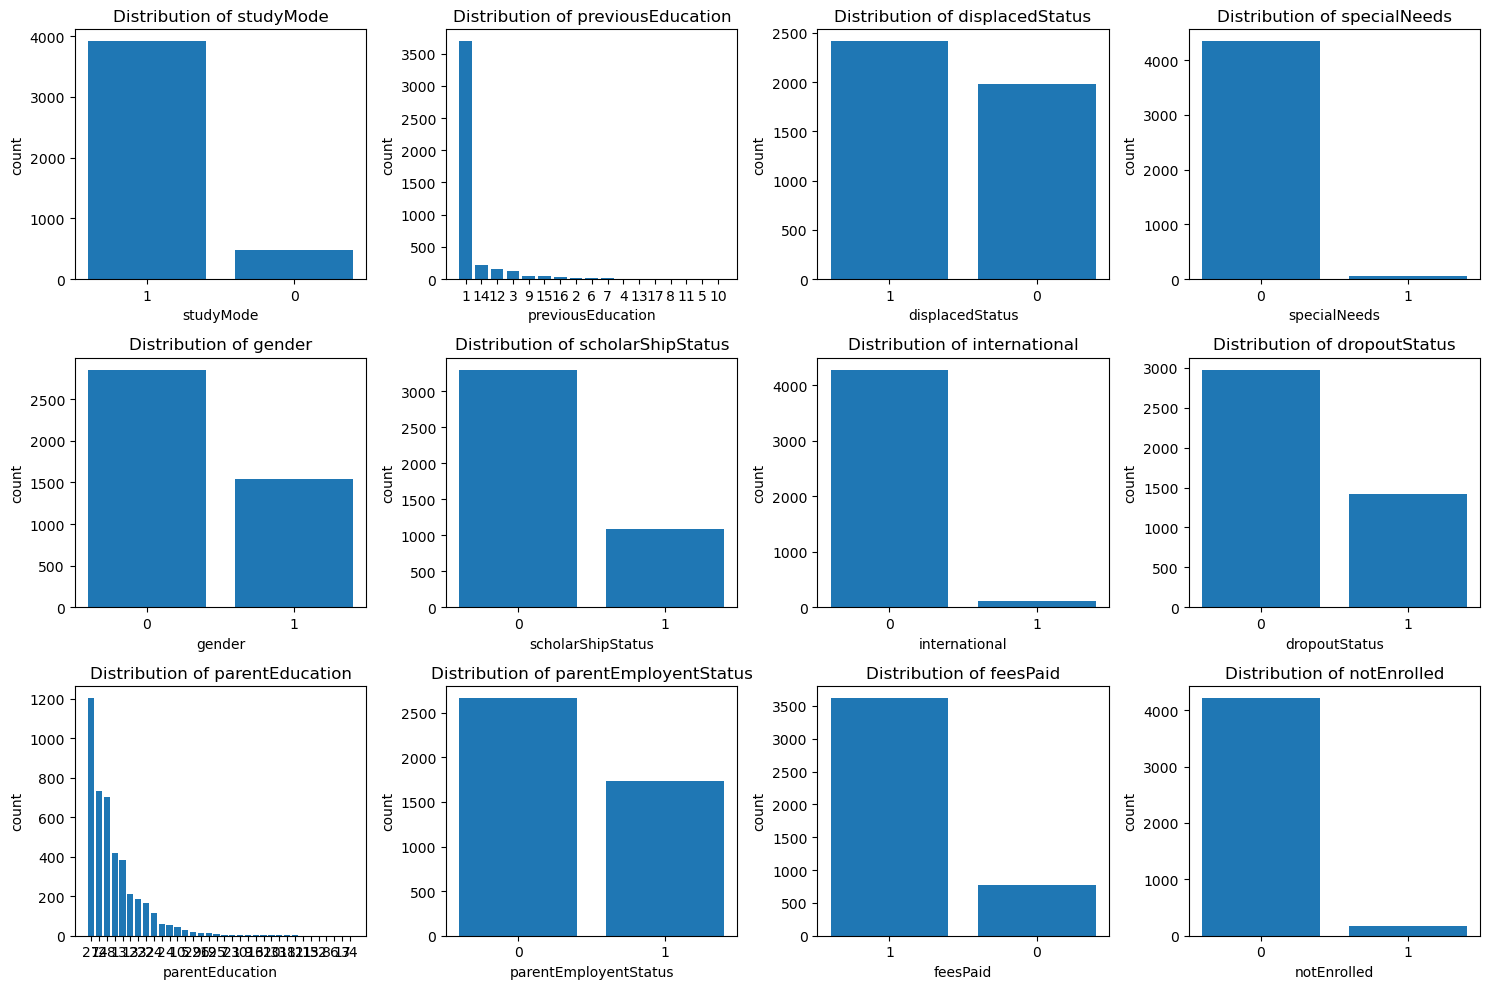

In [26]:
# Basic eda

def show_dist(features, df):
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    axes = axes.flatten()
    
    for ax, feature in zip(axes, features):
        counts = df[feature].value_counts()
        ax.bar(counts.index.astype(str), counts.values)
        ax.set_xlabel(feature)
        ax.set_ylabel('count')
        ax.set_title(f"Distribution of {feature}")
        ax.tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

show_dist([    "studyMode",
    "previousEducation",
    "displacedStatus",
    "specialNeeds",
    "gender",
    "scholarShipStatus",
    "international",
    "dropoutStatus",
    "parentEducation",
    "parentEmployentStatus",
    "feesPaid",
    'notEnrolled'], data)

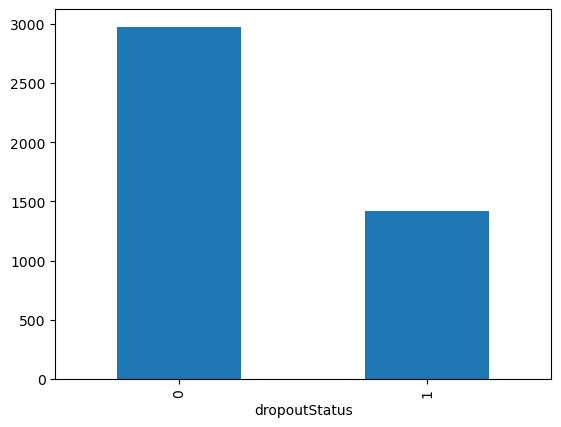

In [27]:
# Label dist, may need oversampling
data['dropoutStatus'].value_counts().plot(kind='bar')
plt.show()

In [29]:
# Continuous feature analysis
continous_features = ['cgpa', 'totalCreditsEnrolled', 'totalCreditsApproved', 'ageAtEnrollment']
data[continous_features].describe()

,cgpa,totalCreditsEnrolled,totalCreditsApproved,ageAtEnrollment
count,4397.000000,4397.000000,4397.000000,4397.000000
mean,5.468531,12.508983,9.255934,23.260632
std,2.189720,4.619087,5.848873,7.594316
min,0.000000,0.000000,0.000000,17.000000
25%,5.620000,10.000000,5.000000,19.000000
50%,6.170000,12.000000,10.000000,20.000000
75%,6.660000,14.000000,12.000000,25.000000
max,9.040000,46.000000,43.000000,70.000000


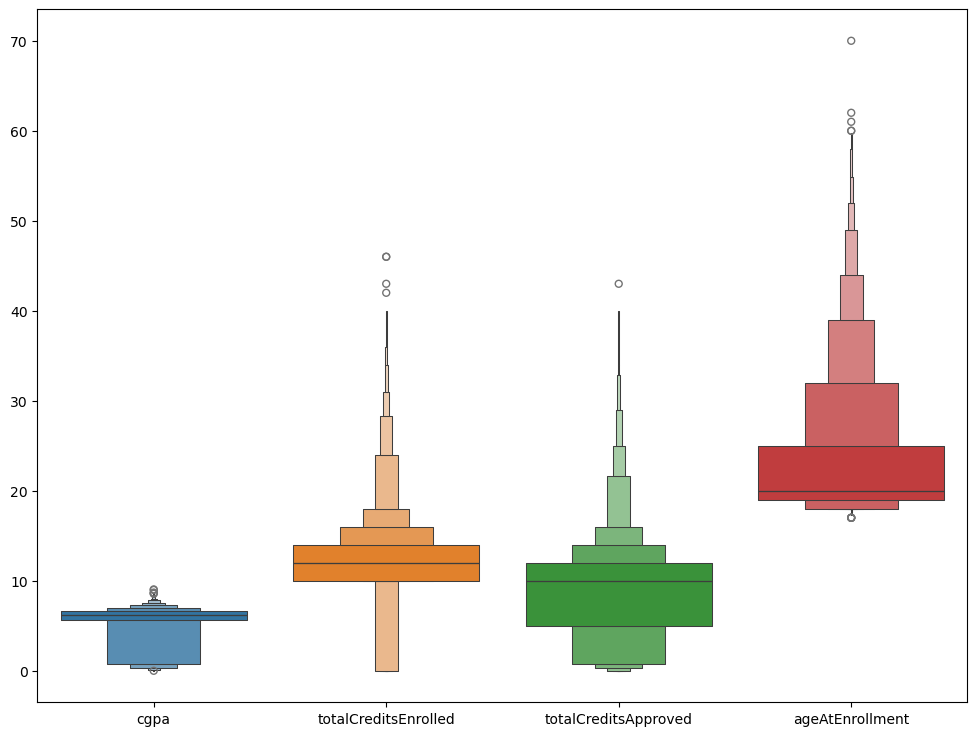

In [30]:
plt.figure(figsize=(12,9))
sns.boxenplot(data[continous_features])
plt.show()

In [31]:
data['cgpa'].value_counts()

cgpa
0.26    184
6.00    106
5.50     76
6.50     67
5.00     51
       ... 
5.48      1
7.53      1
7.72      1
8.32      1
8.50      1
Name: count, Length: 397, dtype: int64

# Data balancing and craeting final, engineered and cleaned data object data

In [32]:
# final oversampling before creating synthetic data
minority = data[data['dropoutStatus'] == 1]
majority = data[data['dropoutStatus'] == 0]

upsampled_data = resample(
  minority,
  replace=True,
  n_samples=len(majority),
  random_state=42
)

balanced_data = pd.concat([majority, upsampled_data])

data = balanced_data

data.shape

(5952, 16)

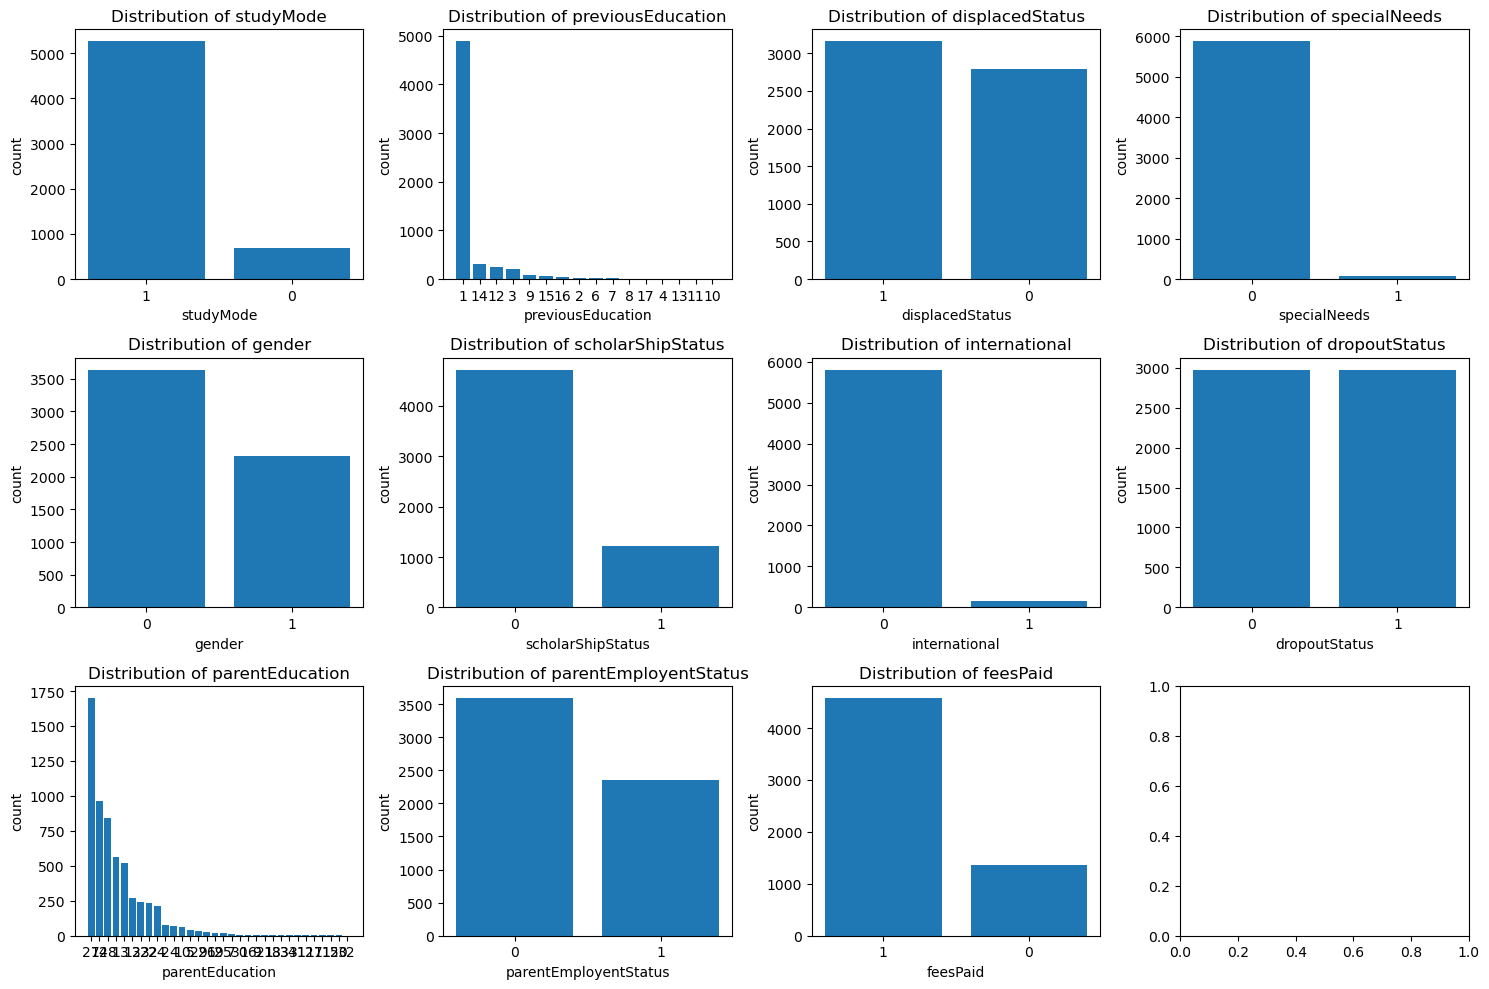

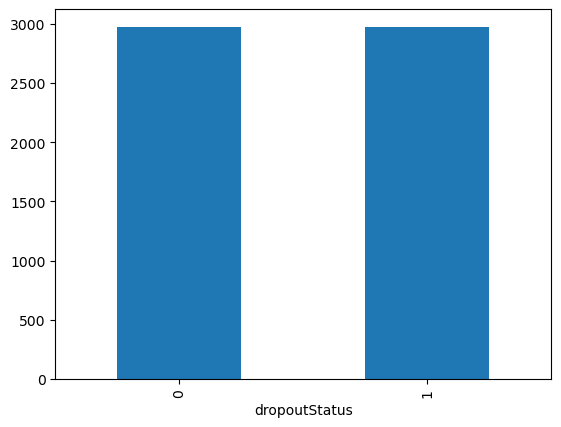

In [33]:
# Dist after upsampling
show_dist([    "studyMode",
    "previousEducation",
    "displacedStatus",
    "specialNeeds",
    "gender",
    "scholarShipStatus",
    "international",
    "dropoutStatus",
    "parentEducation",
    "parentEmployentStatus",
    "feesPaid"], data)
data['dropoutStatus'].value_counts().plot(kind='bar')
plt.show()

# Synthetic data creation

In [34]:
train_df = data.copy()

In [35]:
train_df.columns

Index(['studyMode', 'previousEducation', 'displacedStatus', 'specialNeeds',
       'gender', 'scholarShipStatus', 'ageAtEnrollment', 'international',
       'dropoutStatus', 'parentEducation', 'parentEmployentStatus', 'feesPaid',
       'totalCreditsEnrolled', 'totalCreditsApproved', 'notEnrolled', 'cgpa'],
      dtype='object')

In [36]:
train_df.head()

,studyMode,previousEducation,displacedStatus,specialNeeds,gender,scholarShipStatus,ageAtEnrollment,international,dropoutStatus,parentEducation,parentEmployentStatus,feesPaid,totalCreditsEnrolled,totalCreditsApproved,notEnrolled,cgpa
1,1,1,1,0,1,0,19,0,0,3,1,0,12.0,12.0,0,6.92
3,1,1,1,0,0,0,20,0,0,27,0,1,12.0,11.0,0,6.48
4,0,1,0,0,0,0,45,0,0,28,1,1,12.0,11.0,0,6.35
5,0,12,0,0,1,0,50,0,0,27,0,0,10.0,10.0,0,5.84
6,1,1,1,0,0,1,18,0,0,28,0,1,15.0,15.0,0,6.93


In [37]:
train_df.isna().sum()

studyMode                0
previousEducation        0
displacedStatus          0
specialNeeds             0
gender                   0
scholarShipStatus        0
ageAtEnrollment          0
international            0
dropoutStatus            0
parentEducation          0
parentEmployentStatus    0
feesPaid                 0
totalCreditsEnrolled     0
totalCreditsApproved     0
notEnrolled              0
cgpa                     0
dtype: int64

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5952 entries, 1 to 3582
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studyMode              5952 non-null   int64  
 1   previousEducation      5952 non-null   int64  
 2   displacedStatus        5952 non-null   int64  
 3   specialNeeds           5952 non-null   int64  
 4   gender                 5952 non-null   int64  
 5   scholarShipStatus      5952 non-null   int64  
 6   ageAtEnrollment        5952 non-null   int64  
 7   international          5952 non-null   int64  
 8   dropoutStatus          5952 non-null   int64  
 9   parentEducation        5952 non-null   int64  
 10  parentEmployentStatus  5952 non-null   int64  
 11  feesPaid               5952 non-null   int64  
 12  totalCreditsEnrolled   5952 non-null   float64
 13  totalCreditsApproved   5952 non-null   float64
 14  notEnrolled            5952 non-null   int64  
 15  cgpa     

In [39]:
categorical_columns = [
  "studyMode",
  "previousEducation",
  "displacedStatus",
  "specialNeeds",
  "gender",
  "scholarShipStatus",
  "international",
  "dropoutStatus",
  "parentEducation",
  "parentEmployentStatus",
  "feesPaid",
  'notEnrolled'
]

continuous_columns = [
  'ageAtEnrollment',
  'totalCreditsEnrolled',
  'totalCreditsApproved',
  'cgpa'
]

In [40]:
# preprocessing final dataset
train_df[continuous_columns] = np.log1p(train_df[continuous_columns])

In [41]:
train_df.head()

,studyMode,previousEducation,displacedStatus,specialNeeds,gender,scholarShipStatus,ageAtEnrollment,international,dropoutStatus,parentEducation,parentEmployentStatus,feesPaid,totalCreditsEnrolled,totalCreditsApproved,notEnrolled,cgpa
1,1,1,1,0,1,0,2.995732,0,0,3,1,0,2.564949,2.564949,0,2.069391
3,1,1,1,0,0,0,3.044522,0,0,27,0,1,2.564949,2.484907,0,2.012233
4,0,1,0,0,0,0,3.828641,0,0,28,1,1,2.564949,2.484907,0,1.994700
5,0,12,0,0,1,0,3.931826,0,0,27,0,0,2.397895,2.397895,0,1.922788
6,1,1,1,0,0,1,2.944439,0,0,28,0,1,2.772589,2.772589,0,2.070653


In [42]:
generator = CTGAN(
  epochs=1000,
  batch_size=500,
  generator_dim=(128,128),
  discriminator_dim=(128,128)
)

generator.fit(data, categorical_columns)

  File "c:\Users\manpr\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\manpr\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manpr\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manpr\anaconda3\Lib\subprocess.

In [ ]:
synthetic_data = generator.sample(n=30000)

In [ ]:
train_df[continuous_columns] = np.expm1(train_df[continuous_columns])

In [ ]:
train_df[continuous_columns] = train_df[continuous_columns].round(2)

In [ ]:
synthetic_data["totalCreditsEnrolled"] = synthetic_data["totalCreditsEnrolled"].round(2).clip(lower=0, upper=200)
synthetic_data['totalCreditsApproved'] = synthetic_data['totalCreditsApproved'].round(2).clip(lower=0, upper=300)
synthetic_data['cgpa'] = synthetic_data['cgpa'].clip(lower=0,upper=10).round(2)
synthetic_data['ageAtEnrollment'] = synthetic_data['ageAtEnrollment'].round()
synthetic_data['notEnrolled'] = (synthetic_data['totalCreditsEnrolled'] == 0).astype(int)

In [ ]:
synthetic_data.head()

# Validating synthetic data

## Generic and prliminary manual stat checking

In [ ]:
print(synthetic_data[['cgpa','totalCreditsEnrolled','totalCreditsApproved','ageAtEnrollment']].isna().sum())

print((synthetic_data['totalCreditsApproved'] > synthetic_data['totalCreditsEnrolled']).sum())

print(synthetic_data['cgpa'].describe())
print(synthetic_data['ageAtEnrollment'].describe())

for c in categorical_columns:
    if c in synthetic_data.columns:
        print(c, synthetic_data[c].value_counts().head())


## Checking the disctribution closeness of the continous synthetic values with real ones

In [ ]:
def show_validation_hist(columns, real, synthetic):
  for column in columns:
    real[column].hist(alpha=0.5, label="Real")
    synthetic[column].hist(alpha=0.5, label="Synthetic")
    plt.title(column)
    plt.legend()
    plt.show()

show_validation_hist(continuous_columns, data,synthetic_data)

In [ ]:
synthetic_data['cgpa'].value_counts()

In [ ]:
data['cgpa'].value_counts()

In [ ]:
synthetic_data

In [ ]:
show_dist(categorical_columns, synthetic_data)

In [ ]:
synthetic_data['cgpa'].value_counts(), train_df['cgpa'].value_counts()

# Creating the full final model data and exporting it

In [ ]:
full_data = pd.concat([data,synthetic_data])
full_data.head()

In [ ]:
full_data.shape

In [ ]:
full_data.to_csv('../data/final-data.csv', index=False)